In [ ]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

In [2]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


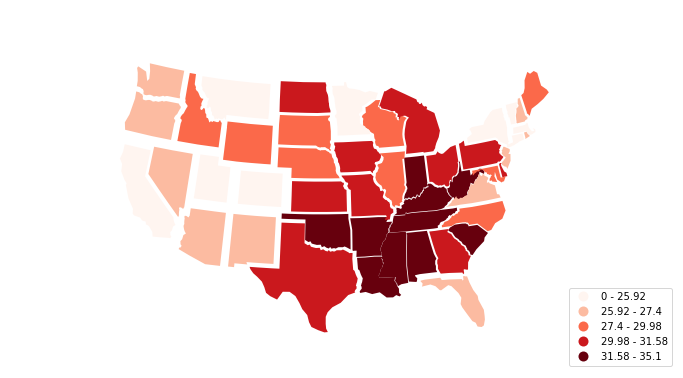

In [3]:
# load the data
obesity_by_state = pd.read_csv(gplt.datasets.get_path('obesity_by_state'), sep='\t')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa['Obesity Rate'] = contiguous_usa['state'].map(lambda state: obesity_by_state.query("State == @state").iloc[0]['Percent'])
scheme = mc.Quantiles(contiguous_usa['Obesity Rate'], k=5)

ax = gplt.cartogram(
    contiguous_usa,
    scale='Obesity Rate', limits=(0.75, 1),
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
    hue='Obesity Rate', cmap='Reds', scheme=scheme,
    linewidth=0.5,
    legend=True, legend_kwargs={'loc': 'lower right'}, legend_var='hue',
    figsize=(12, 7)
)
#gplt.polyplot(contiguous_usa, ax=ax)  #facecolor='lightgray', edgecolor='None', 

#plt.title("Adult Obesity Rate by State, 2013")

In [10]:
# 현재 가상 머신을 자신의 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [11]:
gdf = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/data/sido.shp')
gdf.head(2)

,ADM_SD_CD,SIDO_CD,SIDO_NM,SIDO_NM_AB,pop2021,geometry
0,34,44,충청남도,충남,2181835,"MULTIPOLYGON (((1002967.539 1782019.336, 10034..."
1,22,27,대구광역시,대구,2412642,"POLYGON ((1093065.671 1746665.931, 1093655.003..."


In [16]:
gdf4326 = gdf.to_crs(4326)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


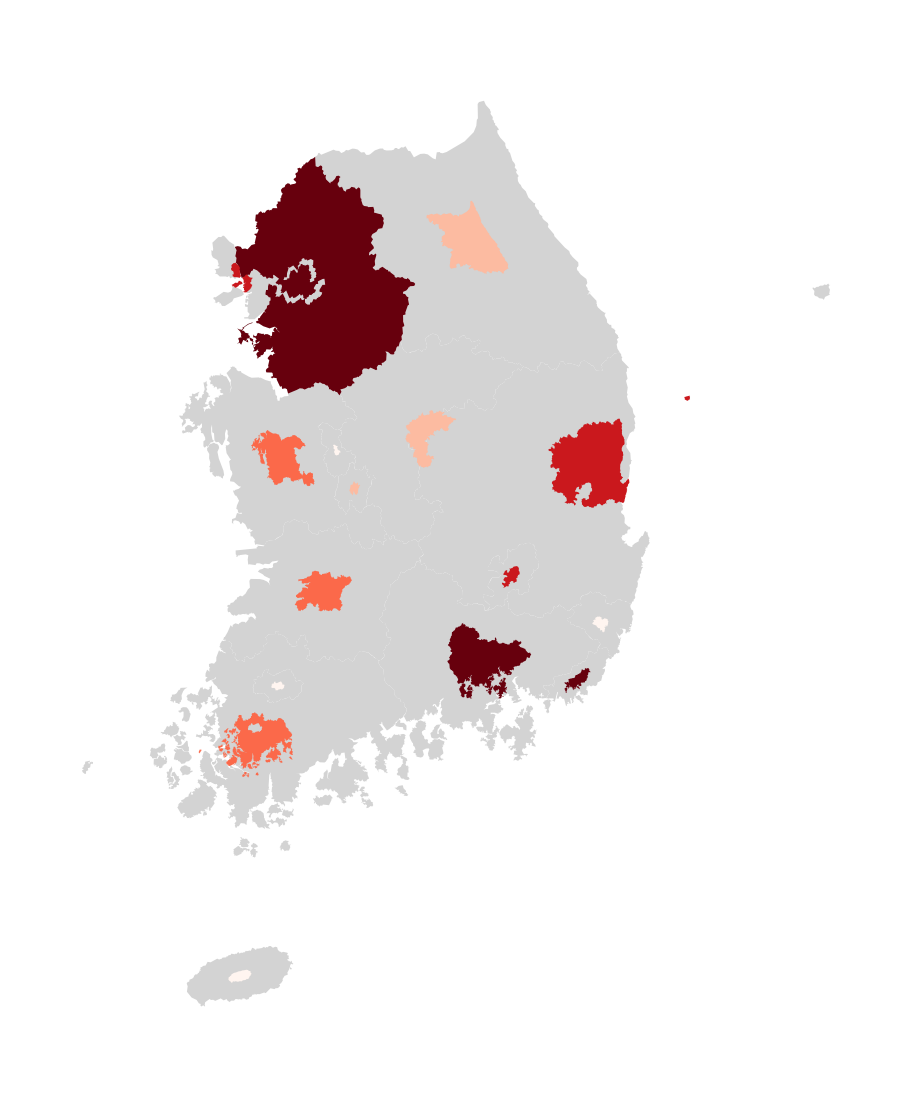

In [24]:
scheme = mc.Quantiles(gdf4326['pop2021'], k=5)

ax = gplt.cartogram(
    gdf4326,
    scale='pop2021', limits=(0.2, 1),
    projection=gcrs.WebMercator(),
    hue='pop2021', cmap='Reds', scheme=scheme,
    linewidth=0.5,
    #legend=True, legend_kwargs={'loc': 'lower right'}, legend_var='hue',
    figsize=(20, 20)
)
gplt.polyplot(gdf4326, ax=ax, facecolor='lightgray', edgecolor='None') 
